**E22CSEU0912 Prajakta Patil B-31**

In [ ]:
import cv2
import numpy as np

# Load an image
image_path = "Image2.png"
image = cv2.imread(image_path)

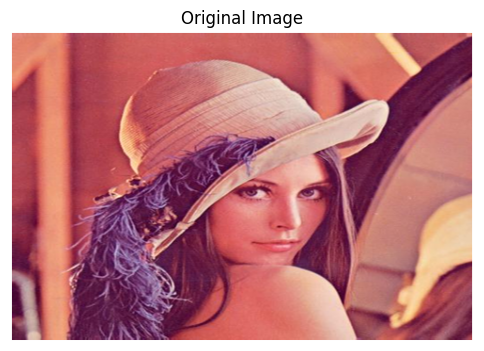

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

Image Size: Width=495, Height=329, Channels=3


In [ ]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 162855


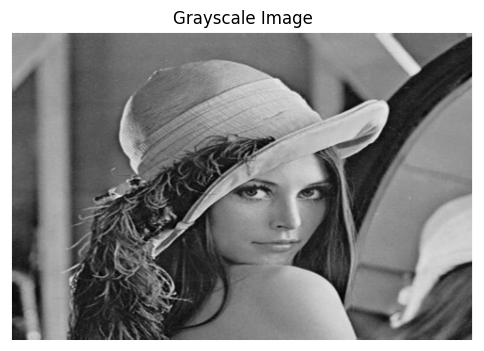

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

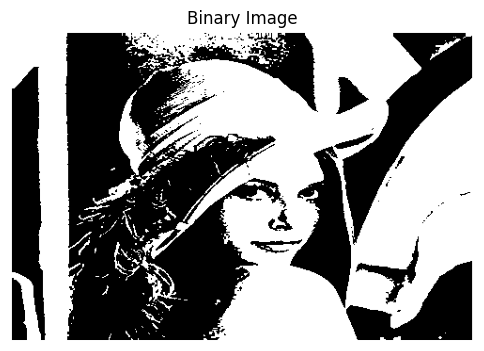

Black Pixel Count: 79657
Size of Image (Pixels): 162855


In [ ]:
threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")
print(f"Size of Image (Pixels): {total_pixels}")

Sobel Operator

In [ ]:
def plot_image(img, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

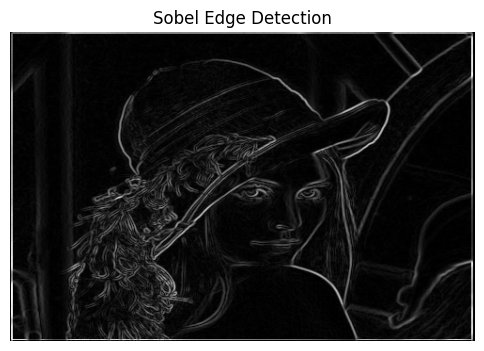

In [ ]:
import matplotlib.pyplot as plt
from skimage import filters

sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)  # Compute gradient magnitude

plot_image(sobel, "Sobel Edge Detection")

Prewitt Operator

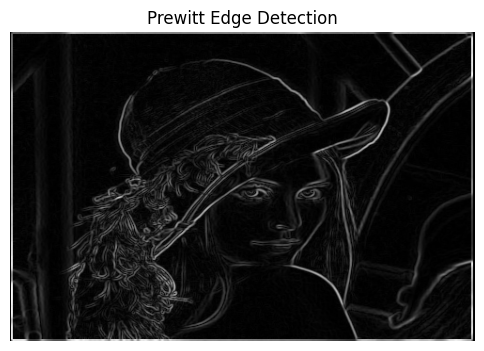

In [ ]:
prewitt_x = filters.prewitt_h(gray_image)
prewitt_y = filters.prewitt_v(gray_image)
prewitt = np.hypot(prewitt_x, prewitt_y)  # Compute gradient magnitude

plot_image(prewitt, "Prewitt Edge Detection")

Roberts Cross Operator

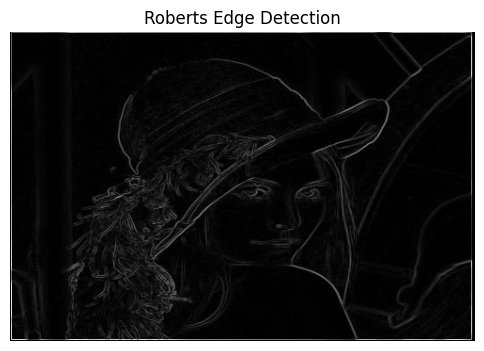

In [ ]:
roberts = filters.roberts(gray_image)  # Apply Roberts operator

plot_image(roberts, "Roberts Edge Detection")

Canny Edge Detector

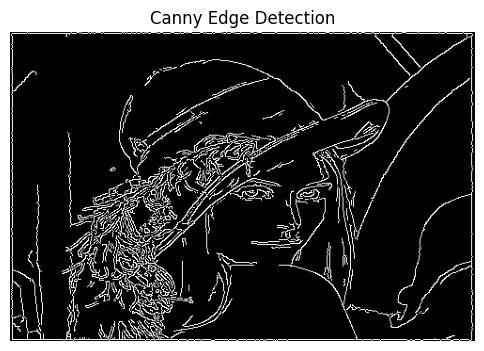

In [ ]:
canny = cv2.Canny(image, 100, 200)
plot_image(canny, "Canny Edge Detection")

 Global Thresholding

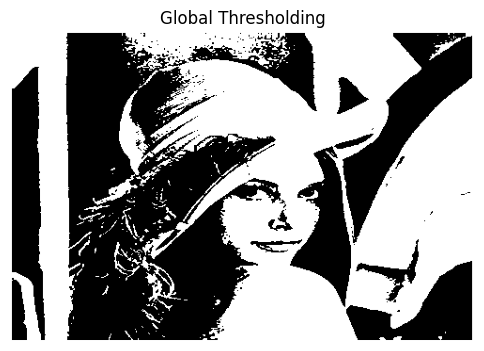

In [ ]:
global_thresh, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plot_image(thresholded_image, "Global Thresholding")

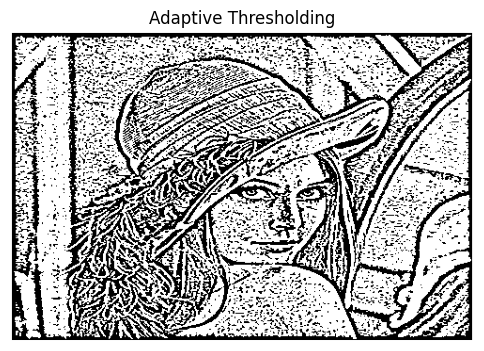

In [ ]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plot_image(adaptive_thresh, "Adaptive Thresholding")

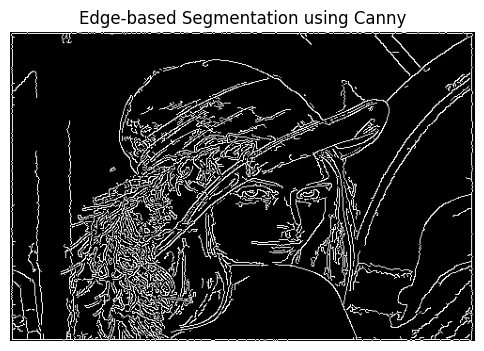

In [ ]:
segmented_canny = cv2.Canny(image, 50, 150)

plot_image(segmented_canny, "Edge-based Segmentation using Canny")

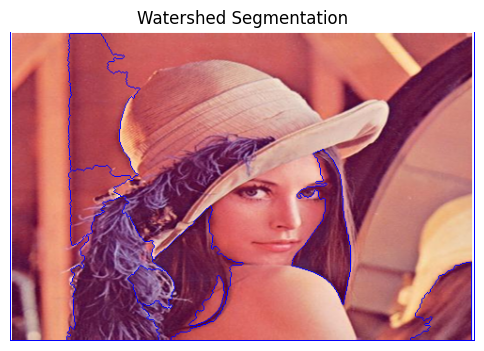

In [ ]:
image_color = cv2.imread("Image2.png")
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find sure background area
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)

# Find sure foreground area
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all markers so that the unknown region is 0
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

plot_image(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB), "Watershed Segmentation")